In [2]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LinearRegression
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [4]:
beijing_train = pd.read_csv('/content/gdrive/My Drive/Colab_Notebooks/Insaid/Term_3-Machine_Learning_Foundation/ML_Projects/Beijing/beijing_train.csv') 
print('Data Shape:', beijing_train.shape)
beijing_train.head()

Data Shape: (403776, 18)


,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.00000,4.00000,4.00000,7.00000,300.00000,77.00000,-0.70000,1023.00000,-18.80000,0.00000,NNW,4.40000,Aotizhongxin
1,2,2013,3,1,1,8.00000,8.00000,4.00000,7.00000,300.00000,77.00000,-1.10000,1023.20000,-18.20000,0.00000,N,4.70000,Aotizhongxin
2,3,2013,3,1,2,7.00000,7.00000,5.00000,10.00000,300.00000,73.00000,-1.10000,1023.50000,-18.20000,0.00000,NNW,5.60000,Aotizhongxin
3,4,2013,3,1,3,6.00000,6.00000,11.00000,11.00000,300.00000,72.00000,-1.40000,1024.50000,-19.40000,0.00000,NW,3.10000,Aotizhongxin
4,5,2013,3,1,4,3.00000,3.00000,12.00000,12.00000,300.00000,72.00000,-2.00000,1025.20000,-19.50000,0.00000,N,2.00000,Aotizhongxin


In [5]:
beijing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403776 entries, 0 to 403775
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   REF_NO   403776 non-null  int64  
 1   year     403776 non-null  int64  
 2   month    403776 non-null  int64  
 3   day      403776 non-null  int64  
 4   hour     403776 non-null  int64  
 5   PM2.5    395301 non-null  float64
 6   PM10     397554 non-null  float64
 7   SO2      395000 non-null  float64
 8   NO2      391917 non-null  float64
 9   CO       383515 non-null  float64
 10  O3       390769 non-null  float64
 11  TEMP     403512 non-null  float64
 12  PRES     403511 non-null  float64
 13  DEWP     403507 non-null  float64
 14  RAIN     403515 non-null  float64
 15  wd       402387 non-null  object 
 16  WSPM     403538 non-null  float64
 17  station  403776 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 55.5+ MB


In [7]:
beijing_train.isnull().sum()

REF_NO         0
year           0
month          0
day            0
hour           0
PM2.5       8475
PM10        6222
SO2         8776
NO2        11859
CO         20261
O3         13007
TEMP         264
PRES         265
DEWP         269
RAIN         261
wd          1389
WSPM         238
station        0
dtype: int64

In [5]:
beijing_train.describe()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,403776.00000,403776.00000,403776.00000,403776.00000,403776.00000,395301.00000,397554.00000,395000.00000,391917.00000,383515.00000,390769.00000,403512.00000,403511.00000,403507.00000,403515.00000,403538.00000
mean,16824.50000,2014.56419,6.73538,15.74822,11.50000,79.24828,104.32790,15.73306,50.35278,1214.84334,58.11933,14.08890,1010.28253,3.15729,0.06705,1.71838
std,9713.35295,1.09750,3.35648,8.80889,6.92220,79.14671,90.13640,21.73946,34.77191,1124.28568,57.37597,11.30353,10.35678,13.61727,0.83784,1.23796
min,1.00000,2013.00000,1.00000,1.00000,0.00000,2.00000,2.00000,0.28560,1.02650,100.00000,0.21420,-19.90000,982.40000,-43.40000,0.00000,0.00000
25%,8412.75000,2014.00000,4.00000,8.00000,5.75000,21.00000,36.00000,2.00000,23.00000,500.00000,11.00000,4.00000,1002.00000,-8.00000,0.00000,0.90000
50%,16824.50000,2015.00000,7.00000,16.00000,11.50000,55.00000,83.00000,7.00000,43.00000,900.00000,45.00000,15.40000,1009.80000,4.20000,0.00000,1.40000
75%,25236.25000,2016.00000,10.00000,23.00000,17.25000,110.00000,145.00000,19.00000,71.00000,1500.00000,83.00000,23.50000,1018.30000,15.50000,0.00000,2.20000
max,33648.00000,2016.00000,12.00000,31.00000,23.00000,999.00000,999.00000,500.00000,290.00000,10000.00000,1071.00000,41.60000,1042.80000,29.10000,72.50000,13.20000


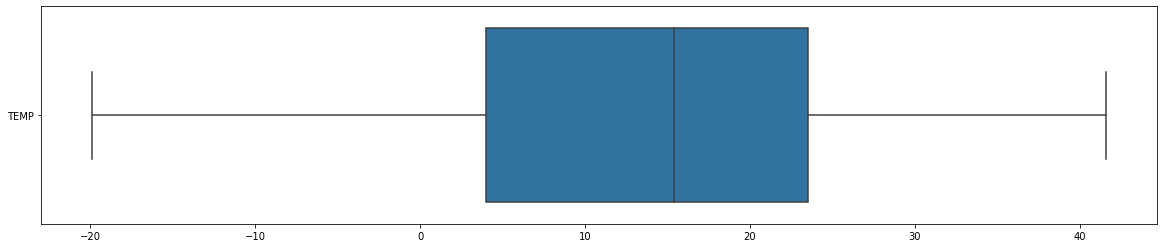

In [32]:
plt.figure(figsize=(20, 4))
sns.boxplot(data=beijing_train[['TEMP']], orient='h')

In [34]:
beijing_train.duplicated().value_counts()

False    403776
dtype: int64

In [42]:
beijing_train['REF_NO'].nunique() * 12 # (12 stations)

403776

In [46]:
beijing_train['station'].nunique()

12

In [47]:
beijing_train['station'].value_counts()   # All stations has recorded correctly

Dongsi           33648
Wanliu           33648
Gucheng          33648
Tiantan          33648
Changping        33648
Guanyuan         33648
Aotizhongxin     33648
Shunyi           33648
Dingling         33648
Nongzhanguan     33648
Wanshouxigong    33648
Huairou          33648
Name: station, dtype: int64

In [48]:
beijing_train['year'].nunique()

4

In [49]:
beijing_train['year'].value_counts()  # No missing values/wrong entries

2016    105408
2015    105120
2014    105120
2013     88128
Name: year, dtype: int64

In [53]:
beijing_train['year'].value_counts().sum()  # No Null values

403776

In [50]:
beijing_train['month'].nunique()

12

In [54]:
beijing_train['month'].value_counts()  # No missing values/wrong entries

12    35712
10    35712
8     35712
7     35712
5     35712
3     35712
11    34560
9     34560
6     34560
4     34560
1     26784
2     24480
Name: month, dtype: int64

In [55]:
beijing_train['month'].value_counts().sum()

403776

In [56]:
beijing_train['hour'].nunique()

24

In [58]:
beijing_train['hour'].value_counts()

23    16824
22    16824
1     16824
2     16824
3     16824
4     16824
5     16824
6     16824
7     16824
8     16824
9     16824
10    16824
11    16824
12    16824
13    16824
14    16824
15    16824
16    16824
17    16824
18    16824
19    16824
20    16824
21    16824
0     16824
Name: hour, dtype: int64

In [59]:
beijing_train['hour'].value_counts().sum()

403776

In [60]:
beijing_train['PM2.5'].nunique()

866

In [63]:
403776 - beijing_train['PM2.5'].value_counts().sum()   #missing values are there

8475

In [64]:
beijing_train['PM2.5'].describe()

count   395301.00000
mean        79.24828
std         79.14671
min          2.00000
25%         21.00000
50%         55.00000
75%        110.00000
max        999.00000
Name: PM2.5, dtype: float64

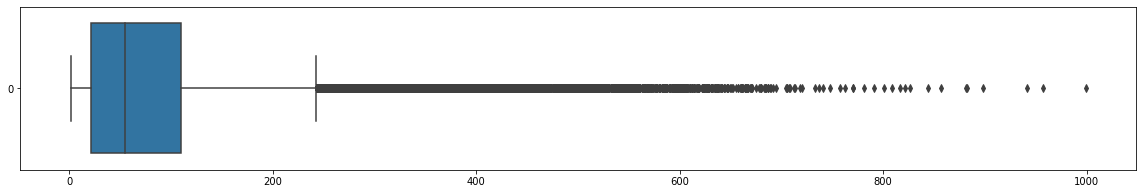

In [70]:
plt.figure(figsize = (20,3))
sns.boxplot(data=beijing_train['PM2.5'], orient='h')

In [97]:
beijing_train[(beijing_train['station'] == 'Aotizhongxin') & (beijing_train['year'] == 2013)]['PM2.5'].median()

62.0

In [6]:
#beijing_train['PM2.5'] = beijing_train['PM2.5'].fillna(beijing_train[(beijing_train['station'] == 'Aotizhongxin') & (beijing_train['year'] == 2013)]['PM2.5'].median())

stations = ['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong']
years = [2013, 2014, 2015, 2016]

for station in stations:
  for year in years:
    beijing_train['PM2.5'] = beijing_train['PM2.5'].fillna(beijing_train[(beijing_train['station'] == station) & (beijing_train['year'] == year)]['PM2.5'].median())

#print(beijing_train[(beijing_train['station'] == station) & (beijing_train['year'] == year)]['PM2.5'].median())

In [102]:
beijing_train['PM2.5'].isna().sum()

0

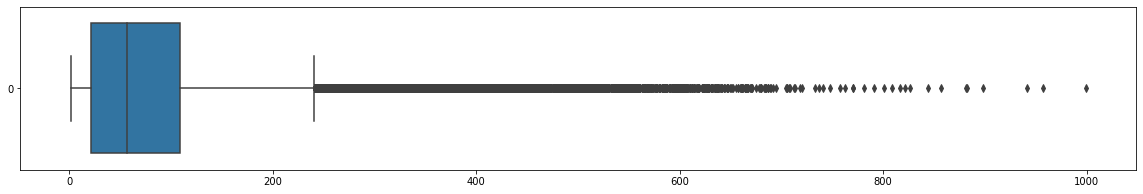

In [103]:
plt.figure(figsize = (20,3))
sns.boxplot(data=beijing_train['PM2.5'], orient='h')

In [104]:
beijing_train['PM2.5'].describe()

count   403776.00000
mean        78.88624
std         78.35070
min          2.00000
25%         21.00000
50%         57.00000
75%        109.00000
max        999.00000
Name: PM2.5, dtype: float64

In [105]:
beijing_train['PM10'].nunique()

1048

In [109]:
403776 - beijing_train['PM10'].value_counts().sum()

6222

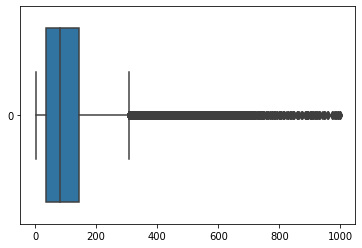

In [111]:
sns.boxplot(data = beijing_train['PM10'], orient = 'h')

In [112]:
beijing_train['PM10'].describe()

count   397554.00000
mean       104.32790
std         90.13640
min          2.00000
25%         36.00000
50%         83.00000
75%        145.00000
max        999.00000
Name: PM10, dtype: float64

In [7]:
stations = ['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong']
years = [2013, 2014, 2015, 2016]

for station in stations:
  for year in years:
    beijing_train['PM10'] = beijing_train['PM10'].fillna(beijing_train[(beijing_train['station'] == station) & (beijing_train['year'] == year)]['PM10'].median())

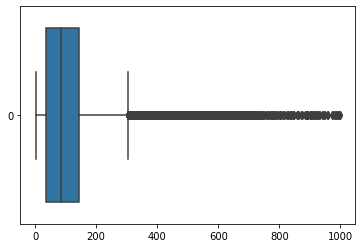

In [114]:
sns.boxplot(data = beijing_train['PM10'], orient = 'h')

In [115]:
beijing_train['PM10'].describe()

count   403776.00000
mean       104.23039
std         89.44262
min          2.00000
25%         37.00000
50%         84.00000
75%        144.00000
max        999.00000
Name: PM10, dtype: float64

In [118]:
beijing_train['SO2'].nunique()

685

In [121]:
beijing_train['SO2'].value_counts().sum()     # missing values are there

395000

In [122]:
beijing_train['SO2'].describe()

count   395000.00000
mean        15.73306
std         21.73946
min          0.28560
25%          2.00000
50%          7.00000
75%         19.00000
max        500.00000
Name: SO2, dtype: float64

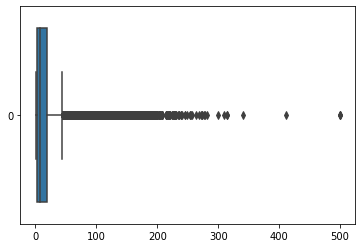

In [123]:
sns.boxplot(data = beijing_train['SO2'], orient='h')

In [8]:
stations = ['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong']
years = [2013, 2014, 2015, 2016]

for station in stations:
  for year in years:
    beijing_train['SO2'] = beijing_train['SO2'].fillna(beijing_train[(beijing_train['station'] == station) & (beijing_train['year'] == year)]['SO2'].median())

In [125]:
beijing_train['SO2'].value_counts().sum()

403776

In [126]:
beijing_train['SO2'].describe()

count   403776.00000
mean        15.69539
std         21.50339
min          0.28560
25%          2.28480
50%          7.00000
75%         19.00000
max        500.00000
Name: SO2, dtype: float64

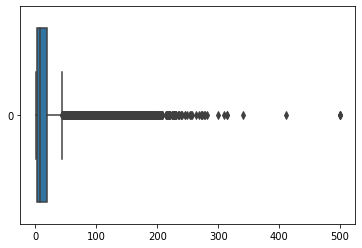

In [127]:
sns.boxplot(data = beijing_train['SO2'], orient='h')

In [129]:
beijing_train['NO2'].nunique()

1209

In [131]:
beijing_train['NO2'].value_counts().sum()

391917

In [132]:
beijing_train['NO2'].describe()

count   391917.00000
mean        50.35278
std         34.77191
min          1.02650
25%         23.00000
50%         43.00000
75%         71.00000
max        290.00000
Name: NO2, dtype: float64

In [9]:
stations = ['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong']
years = [2013, 2014, 2015, 2016]

for station in stations:
  for year in years:
    beijing_train['NO2'] = beijing_train['NO2'].fillna(beijing_train[(beijing_train['station'] == station) & (beijing_train['year'] == year)]['NO2'].median())

In [10]:
stations = ['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong']
years = [2013, 2014, 2015, 2016]

for station in stations:
  for year in years:
    beijing_train['CO'] = beijing_train['CO'].fillna(beijing_train[(beijing_train['station'] == station) & (beijing_train['year'] == year)]['CO'].median())

In [11]:
stations = ['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong']
years = [2013, 2014, 2015, 2016]

for station in stations:
  for year in years:
    beijing_train['O3'] = beijing_train['O3'].fillna(beijing_train[(beijing_train['station'] == station) & (beijing_train['year'] == year)]['O3'].median())

In [12]:
stations = ['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong']
years = [2013, 2014, 2015, 2016]

for station in stations:
  for year in years:
    beijing_train['NO2'] = beijing_train['NO2'].fillna(beijing_train[(beijing_train['station'] == station) & (beijing_train['year'] == year)]['NO2'].median())

In [13]:
stations = ['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong']
years = [2013, 2014, 2015, 2016]
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

for station in stations:
  for year in years:
    for month in months:
      beijing_train['TEMP'] = beijing_train['TEMP'].fillna(beijing_train[(beijing_train['station'] == station) & (beijing_train['year'] == year) \
                                                                         & (beijing_train['month'] == month)]['TEMP'].median())

In [14]:
stations = ['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong']
years = [2013, 2014, 2015, 2016]
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

for station in stations:
  for year in years:
    for month in months:
      beijing_train['PRES'] = beijing_train['PRES'].fillna(beijing_train[(beijing_train['station'] == station) & (beijing_train['year'] == year) \
                                                                         & (beijing_train['month'] == month)]['PRES'].mean())

In [15]:
stations = ['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong']
years = [2013, 2014, 2015, 2016]
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

for station in stations:
  for year in years:
    for month in months:
      beijing_train['DEWP'] = beijing_train['DEWP'].fillna(beijing_train[(beijing_train['station'] == station) & (beijing_train['year'] == year) \
                                                                         & (beijing_train['month'] == month)]['DEWP'].median())

In [16]:
stations = ['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong']
years = [2013, 2014, 2015, 2016]
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

for station in stations:
  for year in years:
    for month in months:
      beijing_train['RAIN'] = beijing_train['RAIN'].fillna(beijing_train[(beijing_train['station'] == station) & (beijing_train['year'] == year) \
                                                                         & (beijing_train['month'] == month)]['RAIN'].median())

In [151]:
beijing_train['wd'].describe()

count     402387
unique        16
top           NE
freq       40049
Name: wd, dtype: object

In [153]:
beijing_train['wd'].mode()

0    NE
dtype: object

In [17]:
stations = ['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong']
years = [2013, 2014, 2015, 2016]

for station in stations:
  for year in years:
    beijing_train['wd'] = beijing_train['wd'].fillna(beijing_train[(beijing_train['station'] == station) & (beijing_train['year'] == year)]['wd'].mode()[0])

#print(beijing_train[(beijing_train['station'] == 'Aotizhongxin') & (beijing_train['year'] == 2013) & (beijing_train['month'] == 11)]['wd'].mode()[0])

In [18]:
stations = ['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong']
years = [2013, 2014, 2015, 2016]
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

for station in stations:
  for year in years:
    for month in months:
      beijing_train['WSPM'] = beijing_train['WSPM'].fillna(beijing_train[(beijing_train['station'] == station) & (beijing_train['year'] == year) \
                                                                         & (beijing_train['month'] == month)]['WSPM'].median())

In [19]:
beijing_train.describe()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,403776.00000,403776.00000,403776.00000,403776.00000,403776.00000,403776.00000,403776.00000,403776.00000,403776.00000,403776.00000,403776.00000,403776.00000,403776.00000,403776.00000,403776.00000,403776.00000
mean,16824.50000,2014.56419,6.73538,15.74822,11.50000,78.88624,104.23039,15.69539,50.63613,1199.04487,57.34236,14.08335,1010.28402,3.15242,0.06701,1.71837
std,9713.35295,1.09750,3.35648,8.80889,6.92220,78.35070,89.44262,21.50339,34.29618,1097.86869,56.60469,11.30192,10.35354,13.61404,0.83758,1.23760
min,1.00000,2013.00000,1.00000,1.00000,0.00000,2.00000,2.00000,0.28560,1.02650,100.00000,0.21420,-19.90000,982.40000,-43.40000,0.00000,0.00000
25%,8412.75000,2014.00000,4.00000,8.00000,5.75000,21.00000,37.00000,2.28480,24.00000,500.00000,12.00000,4.00000,1002.00000,-8.00000,0.00000,0.90000
50%,16824.50000,2015.00000,7.00000,16.00000,11.50000,57.00000,84.00000,7.00000,44.00000,900.00000,43.00000,15.40000,1009.80000,4.10000,0.00000,1.40000
75%,25236.25000,2016.00000,10.00000,23.00000,17.25000,109.00000,144.00000,19.00000,70.00000,1500.00000,82.00000,23.50000,1018.30000,15.50000,0.00000,2.20000
max,33648.00000,2016.00000,12.00000,31.00000,23.00000,999.00000,999.00000,500.00000,290.00000,10000.00000,1071.00000,41.60000,1042.80000,29.10000,72.50000,13.20000


####**Observations:**

1. REF_No is Identifier column, which might not be required
2. PM2.5, PM10, SO2, NO2, CO, O3, WSPM has missing values and Outliers on higher side
3. RAIN does have only max values and outliers
4. PRES, DEWP, TEMP does not have outliers, but little missing values
5. No duplicate records

In [177]:
sns.pairplot(beijing_train, size = 2, aspect = 1.5)

Output hidden; open in https://colab.research.google.com to view.

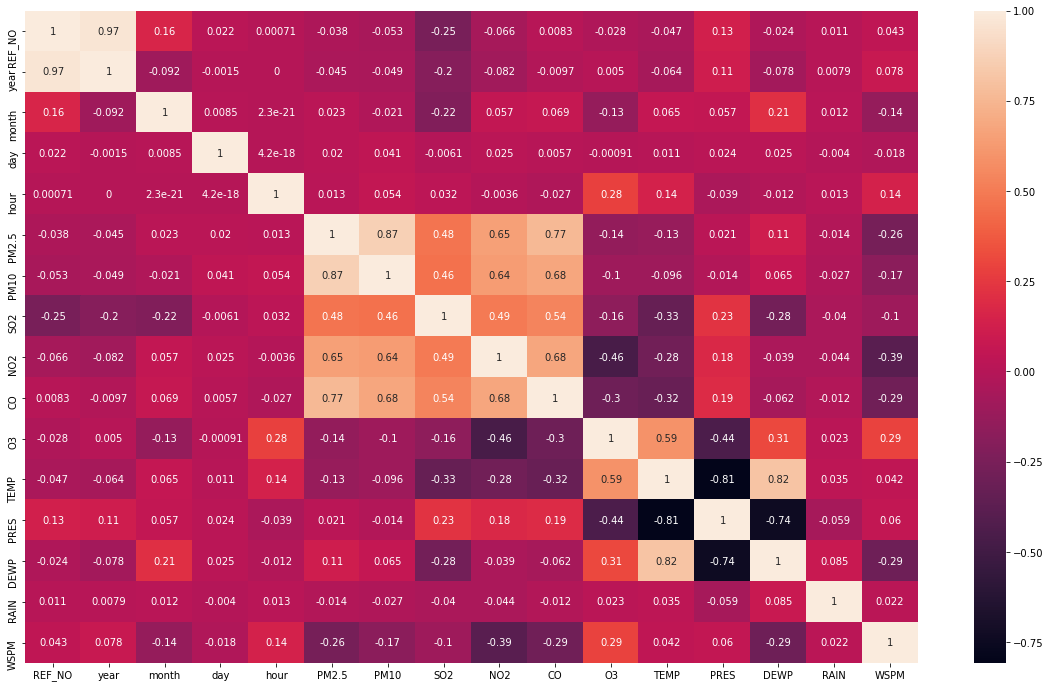

In [176]:
plt.figure(figsize = (20, 12))
sns.heatmap(beijing_train.corr(), annot=True);

In [20]:
beijing_train.columns

Index(['REF_NO', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [21]:
beijing_train.drop(columns=['REF_NO', 'year', 'month', 'day', 'hour', 'PM10', 'CO', 'PRES', 'station', 'wd'], axis=1, inplace=True)
beijing_train.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,4.00000,4.00000,4.00000,7.00000,300.00000,77.00000,-0.70000,1023.00000,-18.80000,0.00000,NNW,4.40000
1,8.00000,8.00000,4.00000,7.00000,300.00000,77.00000,-1.10000,1023.20000,-18.20000,0.00000,N,4.70000
2,7.00000,7.00000,5.00000,10.00000,300.00000,73.00000,-1.10000,1023.50000,-18.20000,0.00000,NNW,5.60000
3,6.00000,6.00000,11.00000,11.00000,300.00000,72.00000,-1.40000,1024.50000,-19.40000,0.00000,NW,3.10000
4,3.00000,3.00000,12.00000,12.00000,300.00000,72.00000,-2.00000,1025.20000,-19.50000,0.00000,N,2.00000


In [38]:
beijing_train.drop(columns=['CO'], axis=1, inplace=True)
beijing_train.head()

,PM2.5,SO2,NO2,O3,TEMP,DEWP,RAIN,WSPM
0,4.00000,4.00000,7.00000,77.00000,-0.70000,-18.80000,0.00000,4.40000
1,8.00000,4.00000,7.00000,77.00000,-1.10000,-18.20000,0.00000,4.70000
2,7.00000,5.00000,10.00000,73.00000,-1.10000,-18.20000,0.00000,5.60000
3,6.00000,11.00000,11.00000,72.00000,-1.40000,-19.40000,0.00000,3.10000
4,3.00000,12.00000,12.00000,72.00000,-2.00000,-19.50000,0.00000,2.00000


In [24]:
sns.pairplot(beijing_train, size = 2, aspect = 1.5)

Output hidden; open in https://colab.research.google.com to view.

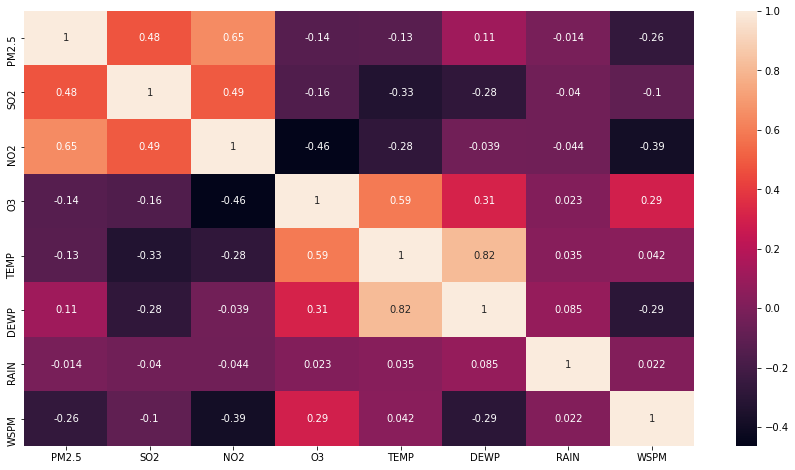

In [39]:
plt.figure(figsize = (15, 8))
sns.heatmap(beijing_train.corr(), annot=True);

In [41]:
feature_cols = ['SO2', 'NO2', 'O3', 'TEMP', 'DEWP', 'RAIN', 'WSPM']
X = beijing_train[feature_cols]                  # use the list to select a subset of the original DataFrame-+
X.head()

,SO2,NO2,O3,TEMP,DEWP,RAIN,WSPM
0,4.00000,7.00000,77.00000,-0.70000,-18.80000,0.00000,4.40000
1,4.00000,7.00000,77.00000,-1.10000,-18.20000,0.00000,4.70000
2,5.00000,10.00000,73.00000,-1.10000,-18.20000,0.00000,5.60000
3,11.00000,11.00000,72.00000,-1.40000,-19.40000,0.00000,3.10000
4,12.00000,12.00000,72.00000,-2.00000,-19.50000,0.00000,2.00000


In [42]:
y = beijing_train['PM2.5']
y.head()

0   4.00000
1   8.00000
2   7.00000
3   6.00000
4   3.00000
Name: PM2.5, dtype: float64

In [43]:
def modelEvaluation(ts, rs, scaler, linreg):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=rs)

  scaler.fit(X_train)
  X_trains = scaler.transform(X_train)
  X_tests = scaler.transform(X_test)

  linreg.fit(X_trains, y_train) 
  y_pred_train = linreg.predict(X_trains) 
  y_pred_test = linreg.predict(X_tests)

  MAE_train = round(metrics.mean_absolute_error(y_train, y_pred_train), 4)
  MAE_test = round(metrics.mean_absolute_error(y_test, y_pred_test), 4)

  MSE_train = round(metrics.mean_squared_error(y_train, y_pred_train), 4)
  MSE_test = round(metrics.mean_squared_error(y_test, y_pred_test), 4)

  RMSE_train = round(np.sqrt(MSE_train), 4)
  RMSE_test = round(np.sqrt(MSE_test), 4)

  beijing_output.loc[len(beijing_output.index)] = [X_train.shape[0], y_train.shape[0], X_test.shape[0], y_test.shape[0], ts, rs, \
                                                   MAE_train, MAE_test, MSE_train, MSE_test, RMSE_train, RMSE_test, (RMSE_train - RMSE_test)]

In [45]:
scaler = StandardScaler()
linreg = LinearRegression()

column_names = ["X_train_Count", "y_train_Count", "X_test_Count", "y_test_Count", "Test_Size", "Random_State", "MAE_Train", "MAE_Test", "MSE_Train", "MSE_Test", "RMSE_Train", "RMSE_Test", "RMSE_Diff"]
beijing_output = pd.DataFrame(columns=column_names)

for i in range(100):
  modelEvaluation(0.20, i, scaler, linreg)

In [46]:
beijing_output["X_train_Count"] = beijing_output["X_train_Count"].astype(int)
beijing_output["y_train_Count"] = beijing_output["y_train_Count"].astype(int)
beijing_output["X_test_Count"] = beijing_output["X_test_Count"].astype(int)
beijing_output["y_test_Count"] = beijing_output["y_test_Count"].astype(int)
beijing_output["Random_State"] = beijing_output["Random_State"].astype(int)

In [32]:
beijing_output.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   X_train_Count  1000 non-null   int64  
 1   y_train_Count  1000 non-null   int64  
 2   X_test_Count   1000 non-null   int64  
 3   y_test_Count   1000 non-null   int64  
 4   Test_Size      1000 non-null   float64
 5   Random_State   1000 non-null   int64  
 6   MAE_Train      1000 non-null   float64
 7   MAE_Test       1000 non-null   float64
 8   MSE_Train      1000 non-null   float64
 9   MSE_Test       1000 non-null   float64
 10  RMSE_Train     1000 non-null   float64
 11  RMSE_Test      1000 non-null   float64
 12  RMSE_Diff      1000 non-null   float64
dtypes: float64(8), int64(5)
memory usage: 109.4 KB


In [47]:
beijing_output.head()

,X_train_Count,y_train_Count,X_test_Count,y_test_Count,Test_Size,Random_State,MAE_Train,MAE_Test,MSE_Train,MSE_Test,RMSE_Train,RMSE_Test,RMSE_Diff
0,323020,323020,80756,80756,0.20000,0,36.82120,36.59270,2772.04470,2704.58390,52.65020,52.00560,0.64460
1,323020,323020,80756,80756,0.20000,1,36.78950,36.76660,2765.34280,2731.55010,52.58650,52.26420,0.32230
2,323020,323020,80756,80756,0.20000,2,36.71140,37.00630,2749.56720,2794.50460,52.43630,52.86310,-0.42680
3,323020,323020,80756,80756,0.20000,3,36.77180,36.81980,2759.06840,2756.55570,52.52680,52.50290,0.02390
4,323020,323020,80756,80756,0.20000,4,36.74790,36.82990,2760.85920,2749.41720,52.54390,52.43490,0.10900


In [36]:
beijing_output.to_csv('/content/gdrive/My Drive/Colab_Notebooks/Insaid/Term_3-Machine_Learning_Foundation/ML_Projects/Beijing/Beijing_ouput8020_RS.csv', index=False, header=True)

In [37]:
def split(X, y):
  return train_test_split(X, y, test_size=0.20, random_state=5094)

In [38]:
X_train, X_test, y_train, y_test = split(X, y)

In [39]:
scaler = RobustScaler()
scaler.fit(X_train)
X_trains = scaler.transform(X_train)
X_tests = scaler.transform(X_test)

In [40]:
linreg = LinearRegression()
linreg.fit(X_trains, y_train) 
y_pred_train = linreg.predict(X_trains) 
y_pred_test = linreg.predict(X_tests)

In [41]:
MAE_train = round(metrics.mean_absolute_error(y_train, y_pred_train), 4)
MAE_test = round(metrics.mean_absolute_error(y_test, y_pred_test), 4)

print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 30.7616
MAE for test set is 30.7834


In [42]:
MSE_train = round(metrics.mean_squared_error(y_train, y_pred_train), 4)
MSE_test = round(metrics.mean_squared_error(y_test, y_pred_test), 4)

print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 2170.3893
MSE for test set is 2170.3834


In [44]:
RMSE_train = round(np.sqrt( metrics.mean_squared_error(y_train, y_pred_train)), 4)
RMSE_test = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)), 4)

print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 46.5874
RMSE for test set is 46.5874


In [49]:
Beijing_X_test = pd.read_csv('/content/gdrive/My Drive/Colab_Notebooks/Insaid/Term_3-Machine_Learning_Foundation/ML_Projects/Beijing/beijing_test.csv') 
print('Data Shape:', Beijing_X_test.shape)
Beijing_X_test.head()

Data Shape: (16728, 17)


,REF_NO,year,month,day,hour,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,33649,2017,1,1,0,496.00000,8.00000,121.00000,6100.00000,4.00000,-4.70000,1022.10000,-6.10000,0.00000,ENE,1.00000,Aotizhongxin
1,33650,2017,1,1,1,497.00000,7.00000,113.00000,6300.00000,4.00000,-5.20000,1022.30000,-6.40000,0.00000,E,0.70000,Aotizhongxin
2,33651,2017,1,1,2,469.00000,7.00000,111.00000,6200.00000,4.00000,-5.40000,1022.50000,-6.50000,0.00000,ENE,1.10000,Aotizhongxin
3,33652,2017,1,1,3,425.00000,6.00000,109.00000,5900.00000,3.00000,-5.20000,1022.50000,-6.20000,0.00000,E,1.10000,Aotizhongxin
4,33653,2017,1,1,4,468.00000,10.00000,123.00000,7700.00000,16.00000,-5.00000,1021.90000,-5.80000,0.00000,ENE,1.00000,Aotizhongxin


In [50]:
beijing_test_REFNO = pd.DataFrame(Beijing_X_test["REF_NO"])
beijing_test_REFNO.head()

,REF_NO
0,33649
1,33650
2,33651
3,33652
4,33653


In [51]:
Beijing_X_test = Beijing_X_test[['SO2', 'NO2', 'CO', 'O3']]
Beijing_X_test.head()

,SO2,NO2,CO,O3
0,8.00000,121.00000,6100.00000,4.00000
1,7.00000,113.00000,6300.00000,4.00000
2,7.00000,111.00000,6200.00000,4.00000
3,6.00000,109.00000,5900.00000,3.00000
4,10.00000,123.00000,7700.00000,16.00000


In [52]:
beijing_tests_data = scaler.transform(Beijing_X_test)
y_pred_beijing_test = linreg.predict(beijing_tests_data)

In [53]:
y_pred_beijing_test = pd.DataFrame(y_pred_beijing_test)

In [54]:
y_pred_beijing_test.head()

,0
0,320.57193
1,322.92923
2,317.27372
3,302.86837
4,392.39735


In [55]:
y_pred_beijing_test.columns = ["PM2.5"]
y_pred_beijing_test.head()

,PM2.5
0,320.57193
1,322.92923
2,317.27372
3,302.86837
4,392.39735


In [57]:
y_pred_beijing_test = pd.concat([beijing_test_REFNO["REF_NO"], pd.DataFrame(y_pred_beijing_test)["PM2.5"]], axis=1)

In [58]:
y_pred_beijing_test.head()

,REF_NO,PM2.5
0,33649,320.57193
1,33650,322.92923
2,33651,317.27372
3,33652,302.86837
4,33653,392.39735


In [59]:
y_pred_beijing_test.to_csv('/content/gdrive/My Drive/Colab_Notebooks/Insaid/Term_3-Machine_Learning_Foundation/ML_Projects/Beijing/beijing_output.csv', index=False, header=False)

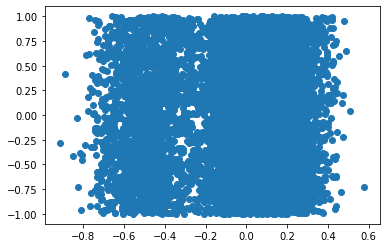

In [ ]:
y = np.linspace(-1, 1, 10000)
x = abalone_output['RMSE_Diff']

plt.scatter(x, y)